In [ ]:
pip install tensorflow

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
pip show pip


Name: pip
Version: 21.1.3
Summary: The PyPA recommended tool for installing Python packages.
Home-page: https://pip.pypa.io/
Author: The pip developers
Author-email: distutils-sig@python.org
License: MIT
Location: /usr/local/lib/python3.7/dist-packages
Requires: 
Required-by: pip-tools, fastcore, fastai


In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.utils import np_utils
#from keras.optimizers import RMSprop
from tensorflow.keras.optimizers import RMSprop
from keras.callbacks import ReduceLROnPlateau
from keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from random import randrange

In [ ]:
import pandas as pd

df_train = pd.read_csv('mnist_train_final.csv')
df_test = pd.read_csv('mnist_test_final.csv')

In [ ]:
df_train.head()

,label,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,...,0.608,0.609,0.610,0.611,0.612,0.613,0.614,0.615,0.616,0.617
0,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,4,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,9,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


/usr/local/lib/python3.7/dist-packages/matplotlib/text.py:1165: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


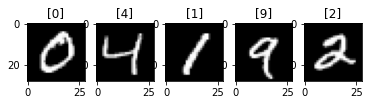

In [ ]:
df_train_x = df_train.iloc[:,1:]  #get 784 pixel value columns after the first column
df_train_y = df_train.iloc[:,:1]  #get the first label column
 
#reshape our training X into 28x28 array and display its label and image using imshow()
ax = plt.subplots(1,5)       
for i in range(0,5):
    ax[1][i].imshow(df_train_x.values[i].reshape(28,28), cmap='gray')
    ax[1][i].set_title(df_train_y.values[i])

In [ ]:
def cnn_model(result_class_size):
    model = Sequential()
    model.add(Conv2D(30, (5, 5), input_shape=(28,28,1), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Conv2D(15, (3, 3), activation='relu'))
    model.add(Dropout(0.2))
    model.add(Flatten())
    model.add(Dense(128, activation='relu'))
    model.add(Dense(50, activation='relu'))
    model.add(Dense(result_class_size, activation='softmax'))   
    model.compile(loss='categorical_crossentropy', optimizer=RMSprop(), metrics=['accuracy'])
    return model

In [ ]:
arr_train_y = np_utils.to_categorical(df_train_y['label'].values)
model = cnn_model(arr_train_y.shape[1])

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 24, 24, 30)        780       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 12, 12, 30)       0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 10, 10, 15)        4065      
                                                                 
 dropout_1 (Dropout)         (None, 10, 10, 15)        0         
                                                                 
 flatten_1 (Flatten)         (None, 1500)              0         
                                                                 
 dense_3 (Dense)             (None, 128)               192128    
                                                      

In [ ]:
import numpy as np

In [ ]:
#normalize 255 grey scale to values between 0 and 1 
df_test = df_test / 255   
df_train_x = df_train_x / 255
 
#reshape training X and texting X to (number, height, width, channel)
arr_train_x_28x28 = np.reshape(df_train_x.values, (df_train_x.values.shape[0], 28, 28, 1))
arr_test_x_28x28 = np.reshape(df_test.values, (df_test.values.shape[0], 28, 28, 1))
 
#validation package size = 8%
random_seed = 7
split_train_x, split_val_x, split_train_y, split_val_y, = train_test_split(arr_train_x_28x28, arr_train_y, test_size = 0.08, random_state=random_seed)

ValueError: ignored